# EDA solo project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/CustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### **Glosario de Columnas - CustomerChurn.csv**

| Columna               | Descripción                                                                 | Valores posibles                                                                 |
|-----------------------|-----------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| **customerID**        | Identificador único del cliente.                                            | Códigos alfanuméricos (ej: `7590-VHVEG`).                                        |
| **gender**            | Género del cliente.                                                         | `Female`, `Male`.                                                                |
| **SeniorCitizen**     | Indica si el cliente es adulto mayor (ej: >65 años).                        | `0` (No), `1` (Sí).                                                             |
| **Partner**           | Si el cliente tiene pareja (conyugue o compañero/a).                        | `Yes`, `No`.                                                                     |
| **Dependents**        | Si el cliente tiene dependientes (hijos o personas a cargo).                | `Yes`, `No`.                                                                     |
| **tenure**            | Meses de permanencia del cliente en la compañía.                            | Enteros (ej: `1`, `34`).                                                         |
| **PhoneService**      | Si el cliente tiene servicio telefónico contratado.                         | `Yes`, `No`.                                                                     |
| **MultipleLines**     | Si el cliente tiene múltiples líneas telefónicas.                          | `Yes`, `No`, `No phone service` (si no tiene servicio).                          |
| **InternetService**   | Tipo de servicio de internet contratado.                                    | `DSL`, `Fiber optic`, `No`.                                                      |
| **OnlineSecurity**    | Si tiene seguridad en línea (ej: antivirus).                                | `Yes`, `No`, `No internet service` (si no tiene internet).                       |
| **OnlineBackup**      | Si tiene backup en la nube.                                                 | `Yes`, `No`, `No internet service`.                                              |
| **DeviceProtection**  | Si tiene protección para dispositivos.                                      | `Yes`, `No`, `No internet service`.                                              |
| **TechSupport**       | Si tiene soporte técnico incluido.                                          | `Yes`, `No`, `No internet service`.                                              |
| **StreamingTV**       | Si tiene servicio de streaming de TV (ej: Netflix).                         | `Yes`, `No`, `No internet service`.                                              |
| **StreamingMovies**   | Si tiene servicio de streaming de películas.                                | `Yes`, `No`, `No internet service`.                                              |
| **Contract**          | Tipo de contrato del cliente.                                               | `Month-to-month`, `One year`, `Two year`.                                        |
| **PaperlessBilling**  | Si recibe factura electrónica (sin papel).                                  | `Yes`, `No`.                                                                     |
| **PaymentMethod**     | Método de pago del cliente.                                                 | `Electronic check`, `Mailed check`, `Bank transfer (automatic)`, `Credit card (automatic)`. |
| **MonthlyCharges**    | Monto mensual facturado al cliente.                                         | Decimales (ej: `29.85`).                                                         |
| **TotalCharges**      | Monto total facturado al cliente durante su relación.                       | Decimales (ej: `1889.5`). Puede estar vacío para clientes nuevos.                |
| **Churn**             | Si el cliente abandonó el servicio ("baja").                                | `Yes` (sí abandonó), `No` (sigue activo).                                        |

In [5]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

# DATA CLEANING

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* Vemos que no hay valores nulos en ninguna columna
* Notamos que la columna TotalCharges debería ser float, pero es object, hay que revisarla

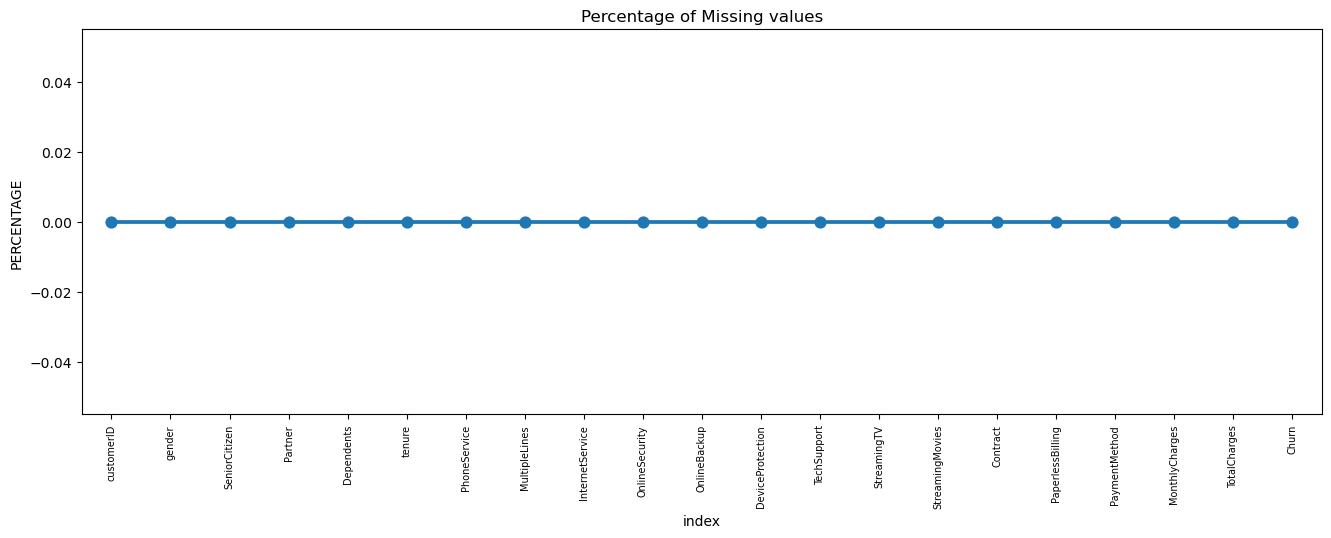

In [7]:
# Verify null values (from yt)
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)  # Nombres de columnas como strings
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [8]:
# ordering the values
df['TotalCharges'].value_counts().sort_index()

TotalCharges
          11
100.2      1
100.25     1
100.35     1
100.4      1
          ..
997.75     1
998.1      1
999.45     1
999.8      1
999.9      1
Name: count, Length: 6531, dtype: int64

In [9]:
# Finding na observations
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
# Confirm if the cause is that Tenure is equal to 0 (should list 11 rows)
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
# fill values with 0
df.loc[(df['tenure'] == 0), 'TotalCharges'] = 0

In [12]:
# Check if it worked
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [13]:
# parse column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [14]:
# statistic metrics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


* SeniorCitizen parece ser categórica (0, 1) por sus cuartiles mostrados
* Tenure (meses) indica que menos del 75% tiene 55 meses
* MonthlyCharges nos indica que el promedio de pago mensual es 64.76

## Check churn distribution

[]

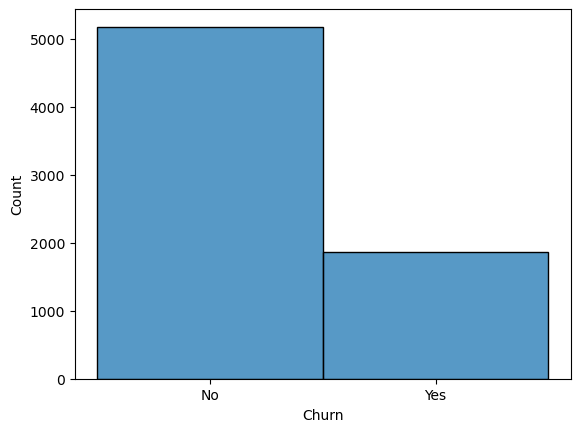

In [15]:
# Realize what's the distribution on churned/not churned
sns.histplot(data=df, x='Churn')
plt.plot()

In [16]:
# Get churned count and yes churned
churn_distribution = df['Churn'].value_counts()
churn_yes = churn_distribution.iat[1]
churn_yes

np.int64(1869)

In [17]:
# Get yes churned %
round(churn_yes / churn_distribution.sum() * 100, 2)

np.float64(26.54)

* Podemos ver que el 26.54% del total de clientes tienen estado churn 'Yes'. Es decir, son los que han sido dados de baja del servicio

### Identify irrelevant columns

In [18]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [19]:
# lets drop columns we won't use
df = df.drop(['customerID'], axis=1)

# Univariate Analysis

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

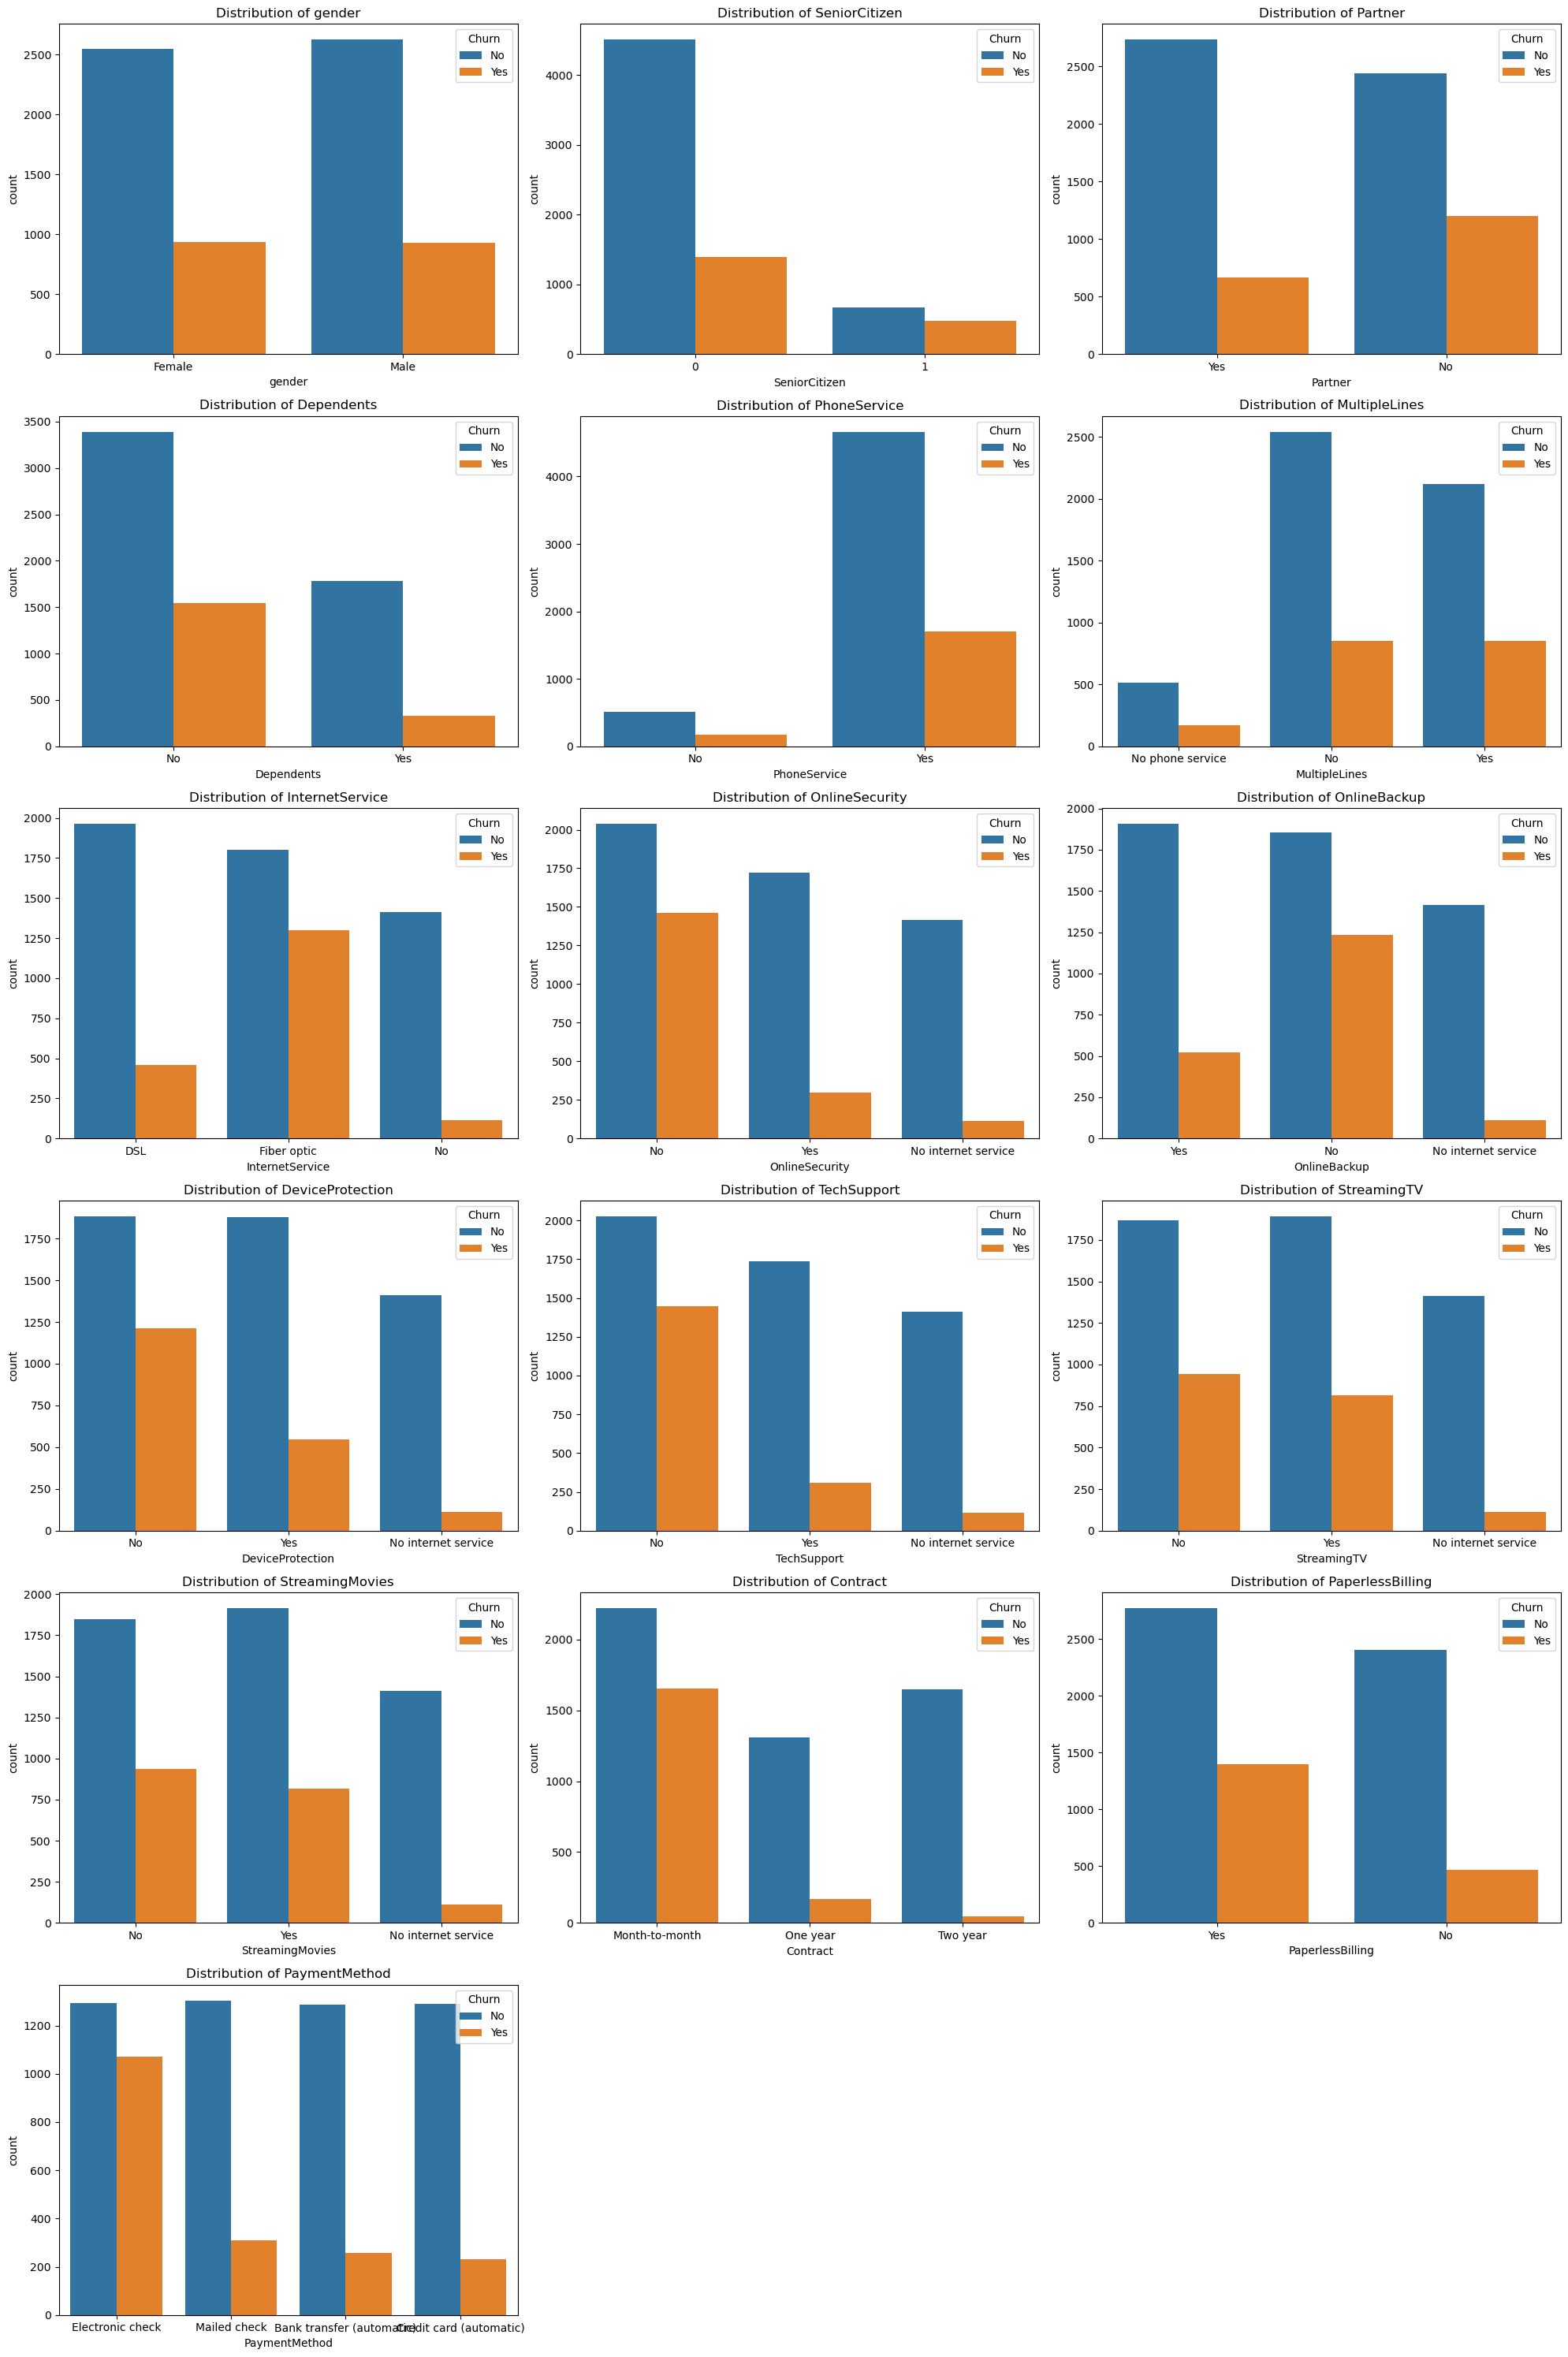

In [ ]:
def plot_univariate_relation(df):
    # get rid irrelevant columns (numeric and target cols)
    # current_df = df.drop(columns=['Churn', 'MonthlyCharges', 'TotalCharges', 'tenure'])
    plot_columns = [ col for col in df.columns if col not in ['Churn', 'MonthlyCharges', 'TotalCharges', 'tenure']]
    # plot_columns = [col for col in df.columns 
    #             if col not in ['Churn', 'MonthlyCharges', 'TotalCharges', 'tenure'] 
    #             and df[col].nunique() < 10]
    
    # get the cols and rows variables for subplots
    n_cols = 3
    n_rows = (len(plot_columns) // n_cols) + 1
    
    # fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    axes = axes.flatten()
    
    # iterate over the columns to plot each one in the suitable ax[i]
    for i, column in enumerate(plot_columns):
        sns.countplot(data=df, x=column, hue='Churn', ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    
    # clean/delete blank plots
    for j in range(len(plot_columns), len(axes)):
        axes[j].set_visible(False)
    
    # plot all the graphs
    plt.tight_layout()
    plt.show()

plot_univariate_relation(df)

Observamos la distribución de cada variable respecto a si fueron dados de baja o no (churn) haciendo el análisis univariado
* Respecto al género no hay diferencia
* En los seniority (tercera edad e.g +65), hay mayor porcentaje de dados de baja si lo son
* En partner(pareja), los que no tienen suelen darse de baja más